### Dataset cereales

En el siguiente dataset se encuentra información sobre diferentes cereales.

Las categorías en las columnas son:
       
   * **name** : Nombre del fabricante
      * A = American Home Food Products
      * G = General Mills
      * K = Kelloggs
      * N = Nabisco
      * P = Post
      * Q = Quaker Oats
      * R = Ralston Purina 
   
   
   *  **type**:
      * C = frío  
      * H = caliente 
        
   
   *  **calories**: calorias por porción
   *  **protein**:  gramos de proteinas
   *  **fat**:      gramos de grasa
   *  **sodium**:   miligramos de sodio
   *  **fiber**:    gramos de fibra dietética
   *  **arbo**:     gramos de azúcares complejos
   *  **sugars**:   gramos de azúcares simples
   *  **potass**:   miligramos de K
   *  **vitamins**: vitaminas y minerales - 0, 25, o 100, indicando el % recomendado por la FDA.
   *  **shelf**:    display shelf (1, 2, or 3, counting from the floor)
   *  **weight**:   peso en onzas de una porción
   *  **cups**:     numero de copas en una porción 
   *  **rating**:   clasificación de los cereales (Possibly from Consumer Reports?)
        
A partir de ésta información:
     
  * Caracterizar el tipo de dato de cada columna (_string, int, float_) y,
  * Reconocer el tipo variable (_continua, categórica_).

### Leer el Archivo 'cereal.csv'.

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Imprimir 5 muestras para reconocimiento de datos,  ¿Coinciden con las caracterizaciones realizadas?

In [47]:
df = pd.read_csv('cereal.csv')
df.sample(5)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
40,Kix,G,C,110,2,1,260,0.0,21.0,3,40,25,2,1.00,1.50,39.241114
69,Total Corn Flakes,G,C,110,2,1,200,0.0,21.0,3,35,100,3,1.00,1.00,38.839746
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.00,1.00,27.753301
63,Shredded Wheat,N,C,80,2,0,0,3.0,16.0,0,95,0,1,0.83,1.00,68.235885


#### Tomar una columna categórica a elección y convertir en una variable dummie.

Se puede utilizar la función ```pd.get_dummies()```.


In [56]:
dummies = pd.get_dummies(df['mfr'])
dummies.head()

,A,G,K,N,P,Q,R
0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1


##### Tomar la columna de fabricante, transformar a variable dummie y contar cuantos productos son de Kelloggs.

In [57]:
dummies['K'].sum()

23

##### Ordenar los fabricantes por cantidad de productos en orden descendente y presentarlo en un gráfico.

In [50]:
orden = pd.get_dummies(df['mfr']).sum().sort_values(ascending = False)
orden

K    23
G    22
P     9
R     8
Q     8
N     6
A     1
dtype: int64

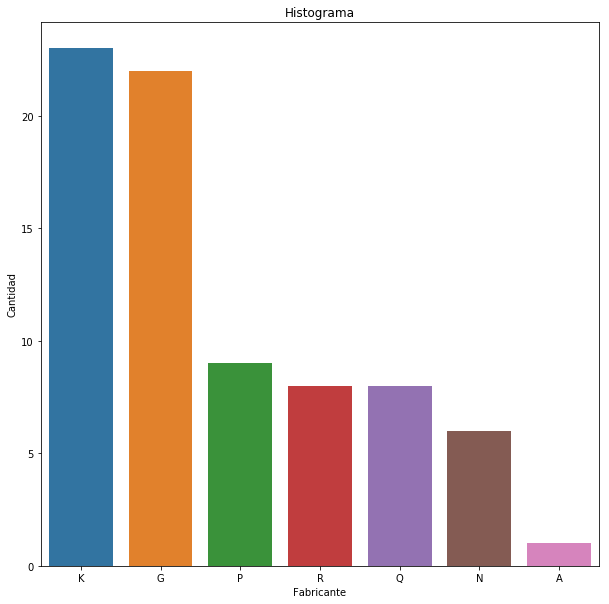

In [65]:



plt.figure(figsize=(10,10))
plt.hist(orden.index, label=orden.index, bins=25)
plt.xlabel('Fabricante')
plt.ylabel('Cantidad')
plt.title('Histograma');
sns.barplot(orden.index, orden.values)

plt.show()

##### La función ```pd.get_dummies()``` permite tomar mas de una columna, por ejemplo, utilizando slicing. 
##### Tomar las columnas 'mfr' y 'type',  y convertirlas en variables dummies simultáneamente, obtener una descripción de ese dataframe.

In [70]:
pd.get_dummies(df[['mfr']['type'] ] ).describe()

TypeError: list indices must be integers or slices, not str

In [64]:
pd.get_dummies(df['type'] ).describe()

,C,H
count,77.000000,77.000000
mean,0.961039,0.038961
std,0.194771,0.194771
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,0.000000
max,1.000000,1.000000


In [62]:
pd.get_dummies(df['mfr'] , df['type']).describe()

,"0 C 1 C 2 C 3 C 4 C 5 C 6 C 7 C 8 C 9 C 10 C 11 C 12 C 13 C 14 C 15 C 16 C 17 C 18 C 19 C 20 H 21 C 22 C 23 C 24 C 25 C 26 C 27 C 28 C 29 C .. 47 C 48 C 49 C 50 C 51 C 52 C 53 C 54 C 55 C 56 C 57 H 58 C 59 C 60 C 61 C 62 C 63 C 64 C 65 C 66 C 67 C 68 C 69 C 70 C 71 C 72 C 73 C 74 C 75 C 76 C Name: type, Length: 77, dtype: object_A","0 C 1 C 2 C 3 C 4 C 5 C 6 C 7 C 8 C 9 C 10 C 11 C 12 C 13 C 14 C 15 C 16 C 17 C 18 C 19 C 20 H 21 C 22 C 23 C 24 C 25 C 26 C 27 C 28 C 29 C .. 47 C 48 C 49 C 50 C 51 C 52 C 53 C 54 C 55 C 56 C 57 H 58 C 59 C 60 C 61 C 62 C 63 C 64 C 65 C 66 C 67 C 68 C 69 C 70 C 71 C 72 C 73 C 74 C 75 C 76 C Name: type, Length: 77, dtype: object_G","0 C 1 C 2 C 3 C 4 C 5 C 6 C 7 C 8 C 9 C 10 C 11 C 12 C 13 C 14 C 15 C 16 C 17 C 18 C 19 C 20 H 21 C 22 C 23 C 24 C 25 C 26 C 27 C 28 C 29 C .. 47 C 48 C 49 C 50 C 51 C 52 C 53 C 54 C 55 C 56 C 57 H 58 C 59 C 60 C 61 C 62 C 63 C 64 C 65 C 66 C 67 C 68 C 69 C 70 C 71 C 72 C 73 C 74 C 75 C 76 C Name: type, Length: 77, dtype: object_K","0 C 1 C 2 C 3 C 4 C 5 C 6 C 7 C 8 C 9 C 10 C 11 C 12 C 13 C 14 C 15 C 16 C 17 C 18 C 19 C 20 H 21 C 22 C 23 C 24 C 25 C 26 C 27 C 28 C 29 C .. 47 C 48 C 49 C 50 C 51 C 52 C 53 C 54 C 55 C 56 C 57 H 58 C 59 C 60 C 61 C 62 C 63 C 64 C 65 C 66 C 67 C 68 C 69 C 70 C 71 C 72 C 73 C 74 C 75 C 76 C Name: type, Length: 77, dtype: object_N","0 C 1 C 2 C 3 C 4 C 5 C 6 C 7 C 8 C 9 C 10 C 11 C 12 C 13 C 14 C 15 C 16 C 17 C 18 C 19 C 20 H 21 C 22 C 23 C 24 C 25 C 26 C 27 C 28 C 29 C .. 47 C 48 C 49 C 50 C 51 C 52 C 53 C 54 C 55 C 56 C 57 H 58 C 59 C 60 C 61 C 62 C 63 C 64 C 65 C 66 C 67 C 68 C 69 C 70 C 71 C 72 C 73 C 74 C 75 C 76 C Name: type, Length: 77, dtype: object_P","0 C 1 C 2 C 3 C 4 C 5 C 6 C 7 C 8 C 9 C 10 C 11 C 12 C 13 C 14 C 15 C 16 C 17 C 18 C 19 C 20 H 21 C 22 C 23 C 24 C 25 C 26 C 27 C 28 C 29 C .. 47 C 48 C 49 C 50 C 51 C 52 C 53 C 54 C 55 C 56 C 57 H 58 C 59 C 60 C 61 C 62 C 63 C 64 C 65 C 66 C 67 C 68 C 69 C 70 C 71 C 72 C 73 C 74 C 75 C 76 C Name: type, Length: 77, dtype: object_Q","0 C 1 C 2 C 3 C 4 C 5 C 6 C 7 C 8 C 9 C 10 C 11 C 12 C 13 C 14 C 15 C 16 C 17 C 18 C 19 C 20 H 21 C 22 C 23 C 24 C 25 C 26 C 27 C 28 C 29 C .. 47 C 48 C 49 C 50 C 51 C 52 C 53 C 54 C 55 C 56 C 57 H 58 C 59 C 60 C 61 C 62 C 63 C 64 C 65 C 66 C 67 C 68 C 69 C 70 C 71 C 72 C 73 C 74 C 75 C 76 C Name: type, Length: 77, dtype: object_R"
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,0.012987,0.285714,0.298701,0.077922,0.116883,0.103896,0.103896
std,0.113961,0.454716,0.460690,0.269807,0.323388,0.307127,0.307127
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
